# Data Preparation

In [ ]:
#Import Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
#Import dataset 
math = pd.read_csv("C:\\Users\\Mariia\\Downloads\\stud_math.csv")

#Dataset contains 13 numeric and 17 string objects. 
#Rename column 20 so we can adress it in Dataframes.

math = math.rename(columns = {'studytime, granular': 'studytime_granular'}) 

#The core variable score is to be used for educationg the ML model. 
#Therefore, delete rows with missing score. 

math = math.dropna(subset=['score'])

#We can't remove all the rows where at least one value is null because we will only have 97 out of 395 entries left. 

In [205]:
#Try to run a Student test for numerical values
#Revert NUll values
math_num = math[['score','age','Medu','Fedu','traveltime','studytime','failures','famrel', 'freetime', 'goout',
       'health', 'absences']]

#Student Test
def get_stat_dif(column):
    cols = math_num.columns
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        print(ttest_ind(math_num.loc[math_num.loc[:, column] == comb[0], 'score'], 
                        math_num.loc[math_num.loc[:, column] == comb[1], 'score']).pvalue)

for col in math_num.columns:
    get_stat_dif(col)          

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


# Outliers

In [15]:
#Check if any numeric values have outliers looking at quantiles and IQR.
#Data Point is considered to be an outlier if value is smaller than Q1 - 1.5*IQR
#or greater than Q3 + 1.5*IQR, where Q1 - quartile 1, 25% of the left data set, Q3 - 25% of the right dataset
#IQR - interquartile range, Q3 - Q1

columns_with_outliers = []

for column in math.columns:
    if math[column].dtype in ('float64', 'int64'):
        #Find Q1
        perc25 = math[column].quantile(0.25)
        #Find Q3
        perc75 = math[column].quantile(0.75)
        #Find IQR
        IQR = perc75 - perc25 
        #Set checks for left and right values
        left_check = perc25 - 1.5*IQR
        right_check = perc75 + 1.5*IQR
        column_min = math[column].min()
        column_max = math[column].max()
        #If Min is smaller than left check and Max is greater than right check, consider the values to be outliers
        if column_min < left_check or column_max > right_check:
                columns_with_outliers.append(column)

print('We have {} columns with outliers: {}'.format(len(columns_with_outliers),columns_with_outliers))

We have 9 columns with outliers: ['age', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 'freetime', 'absences']


<AxesSubplot:xlabel='age'>

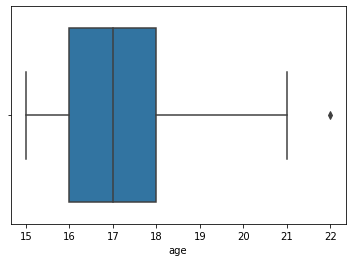

In [36]:
#Build boxplots of these columns so we can assess if we it's a true outlier

#Age is not an outlier as tje max value is 22 and according to the data description this is an expected value
sns.boxplot(data = math, x='age')

<AxesSubplot:xlabel='Fedu'>

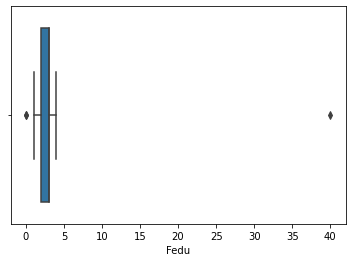

In [38]:
#Here we faced with a clear outlier: expected values are 0-4 and the oulier is 40.
#This is a clear typo and user must have typed either 0 or 4.
sns.boxplot(data = math, x='Fedu')

<AxesSubplot:xlabel='Fedu'>

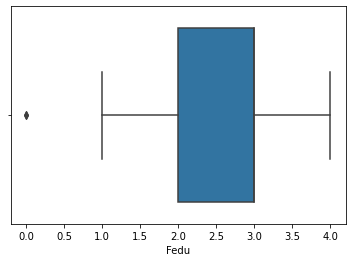

In [81]:
#Replace it with the value closer to median, which is 3, therefore choose 4 for this record
math['Fedu'] = math['Fedu'].replace(40,4)

<AxesSubplot:xlabel='traveltime'>

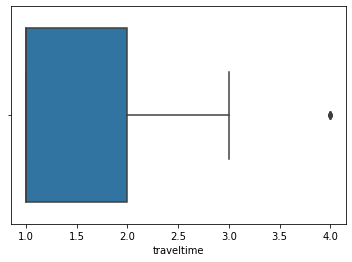

In [40]:
#Traveltime is not am outlier becasue acciording to teh dataset description it might tale more 
#than 60 minutes (4) to get to school. Poor pupil!
sns.boxplot(data = math, x='traveltime')

<AxesSubplot:xlabel='studytime'>

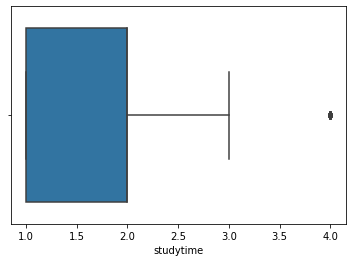

In [82]:
#Again, no outliers
sns.boxplot(data = math, x='studytime')

<AxesSubplot:xlabel='failures'>

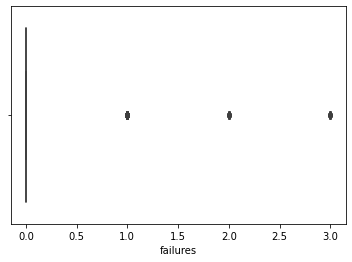

In [83]:
#Values for failures are within allowed borders so we will keep all of them ion a Dataset
sns.boxplot(data = math, x='failures')

<AxesSubplot:xlabel='studytime_granular'>

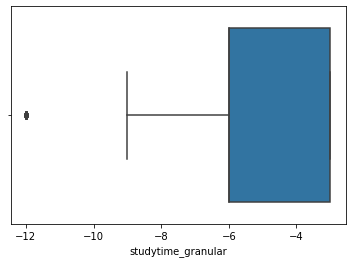

In [84]:
sns.boxplot(data = math, x='studytime_granular')
#We see here negative values for time field. This looks like a dataerror, so the field needs to be investigated further. 

<AxesSubplot:xlabel='studytime_granular', ylabel='score'>

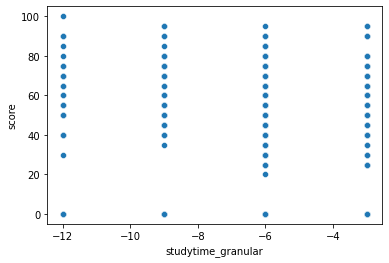

In [90]:
#As we are building dataset for predicting score, build a scatterplot with these two fields
#This is a clear categorical value.

sns.scatterplot(data = math, x='studytime_granular', y='score')

<AxesSubplot:xlabel='studytime_granular', ylabel='studytime'>

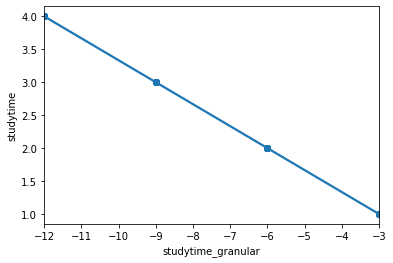

In [92]:
#There is a field studytime in a dataset, let's have a look if they are connected
sns.regplot(data = math, x='studytime_granular', y='studytime')
#there is a clear negative linear correlation, so we will conduct an analysis and remove one of these fields
#Because they are mutually exclusive

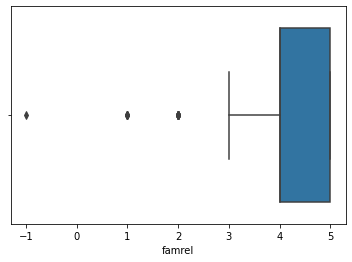

In [95]:
#we can see a typo here again, so will replace -1 to 1
sns.boxplot(data = math, x='famrel')
math['famrel'] = math['famrel'].replace(-1,1)

<AxesSubplot:xlabel='freetime'>

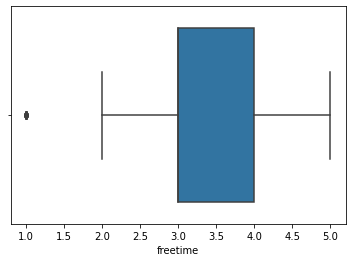

In [97]:
#No outliers here as the values are in the expected range from 1 to 5
sns.boxplot(data = math, x='freetime')

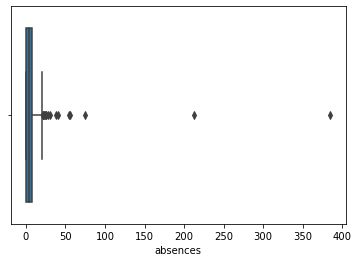

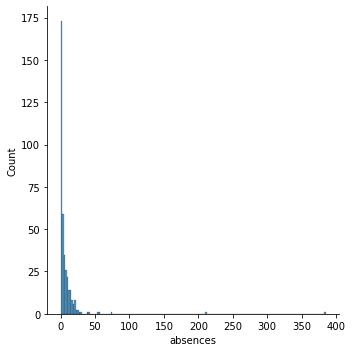

In [104]:
sns.boxplot(data = math, x='absences')
sns.displot(math,x='absences')
#In this case we can see clear outliers we can't explain without asking additional questions.
#What is the time frame we are looking at? How many classes is it possible to skip within this time frame?
#As we don't know the context let's keep all teh values in a  dataset and treat it like a value with a long tail right skewed

In [112]:
#Here we cleared obvious outliers. Before we clean up values further, let's explore the whole dataset further
#By building a series of boxplots in reation to the main value score we are trying to predict
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show() 

In [ ]:
#There is too much data and we used it purely for a check on additional outliers.
#We removed all obvious outliers so can work with data further.

# NaN values

In [113]:
#Define the function to fill NaN values with mode of each column.
#This way we will not skew the data distribution and we can apply it to object values as well. 
#Idea for improvement: fill in the missing values with the nearest neighbour 
#so the standard deviation is not artificially decreased

def fill_with_mode(df, col):
    mode = df[col].mode(dropna=False)[0]
    return df[col].fillna(mode)

#Replace NaN values in all columns

for column in math.columns:
    math[column] = fill_with_mode(math, column)

# Building a Dataframe for the predictive model

<AxesSubplot:>

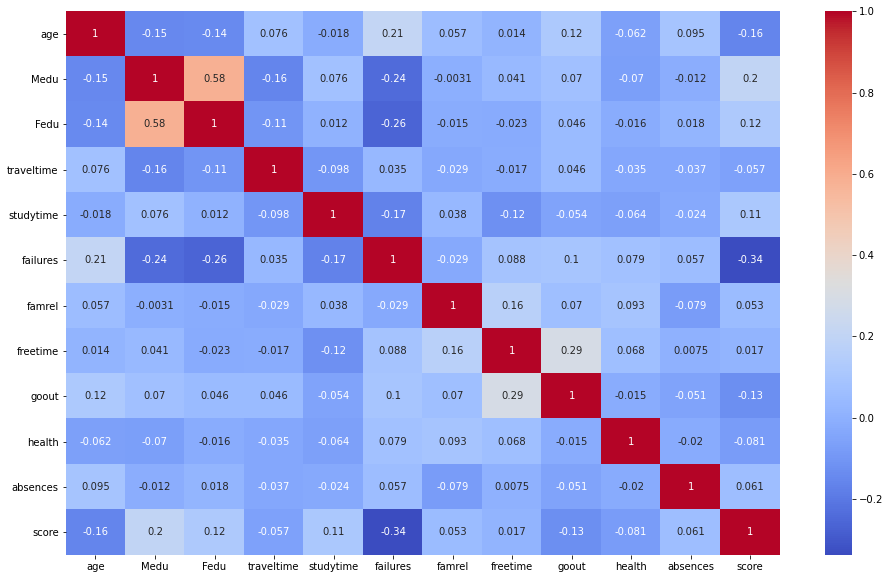

In [128]:
#In order to see how the fields are interconnected, build a correlation matrix
correlation = math.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [116]:
#It is clear that studytime and studytime_granular have a storng negative correlation, so we can drop one
#Of these fields from the data model.
#Let's drop studytime_granualr as this field has negative time and it's not intuitive to interpret it without additional explanation
math = math.drop(columns = 'studytime_granular')

In [131]:
#We have quite a small dataset with half of the descriptive fields.
#Explore numerical fields further and build scatterplots. 
#In order to do so, define a subset with numerical fields only
plt.figure(figsize=(16, 10))
math_numeric = math[['score','age','Medu','Fedu','traveltime','studytime','failures','famrel', 'freetime', 'goout',
       'health', 'absences']]

#There are a lot of graphs which are not clear to read.
#Break the dataset and form 2 subsets with higher (>0.1) and lower (<=0.1) correlation

math_numeric_signific = math_numeric[['score','age','Medu','Fedu','studytime','failures','goout']]
math_numeric_low = math_numeric[['traveltime','famrel','freetime','health','absences']]

<Figure size 1152x720 with 0 Axes>

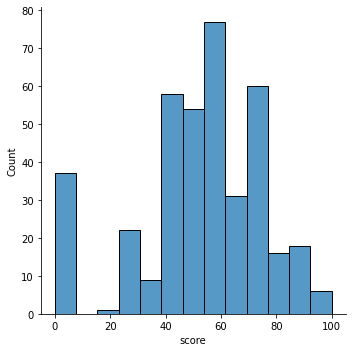

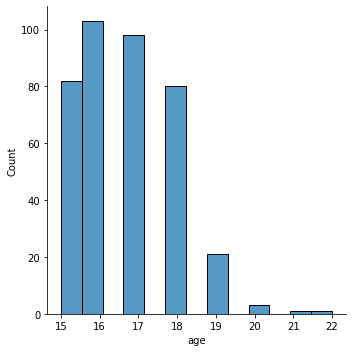

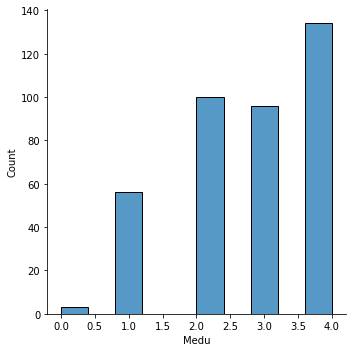

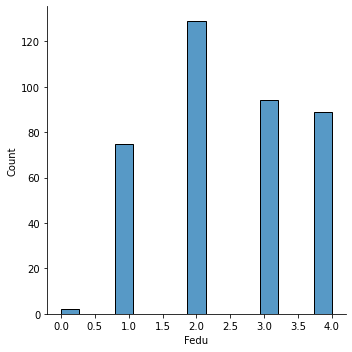

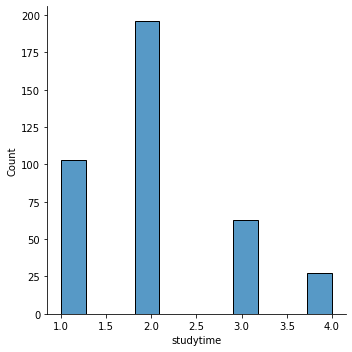

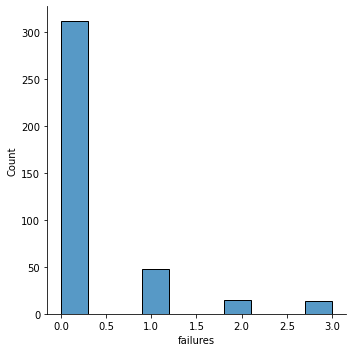

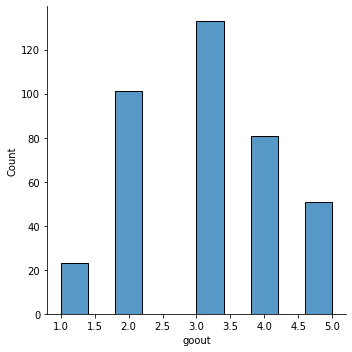

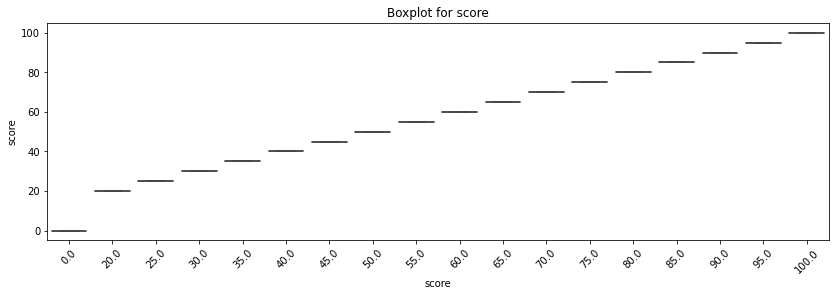

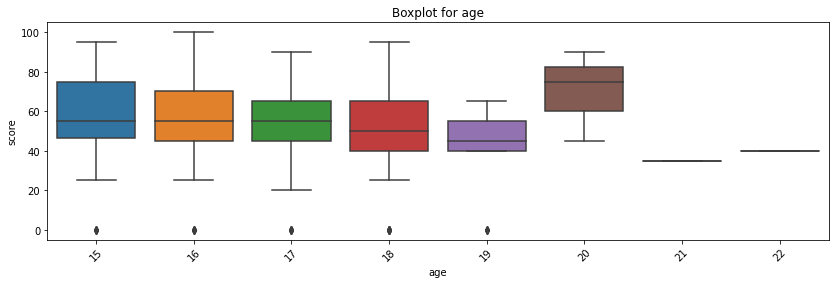

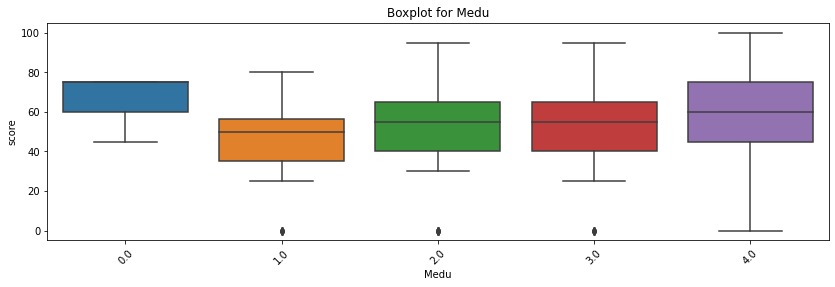

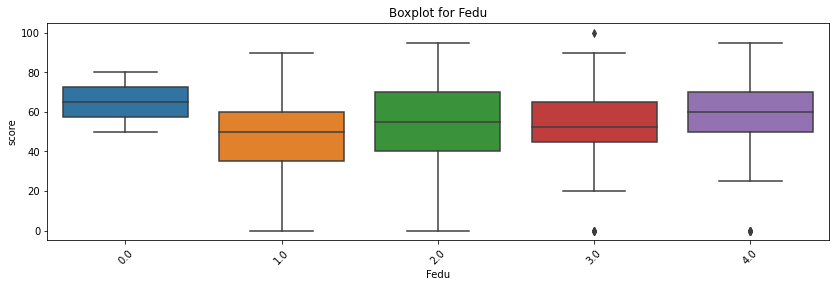

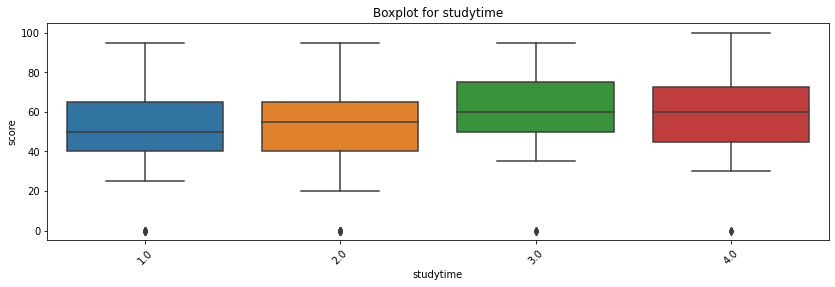

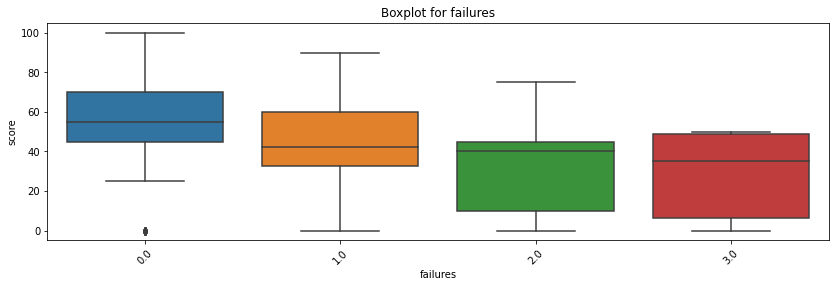

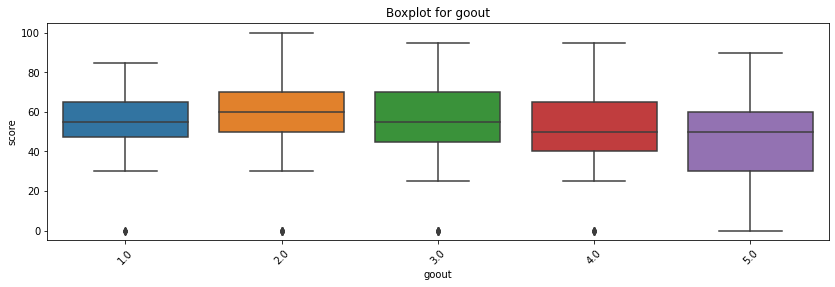

In [136]:
for column in  math_numeric_signific.columns:
    sns.displot(math,x = column)

for column in  math_numeric_signific.columns:
    get_boxplot(column)

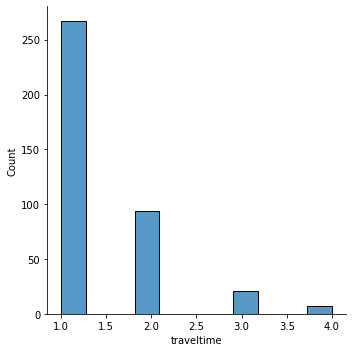

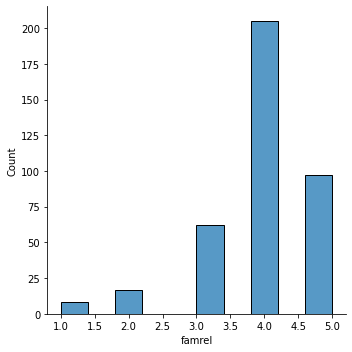

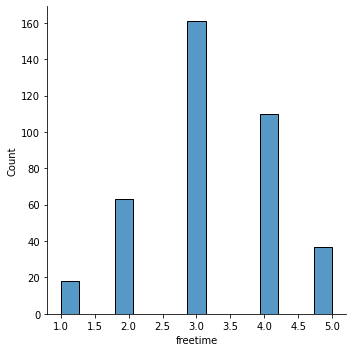

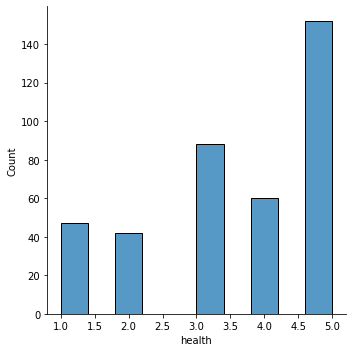

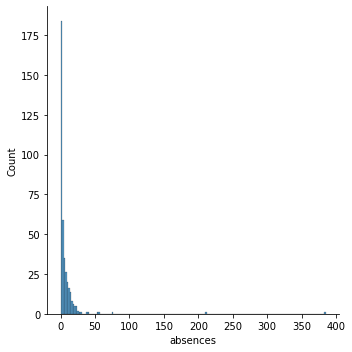

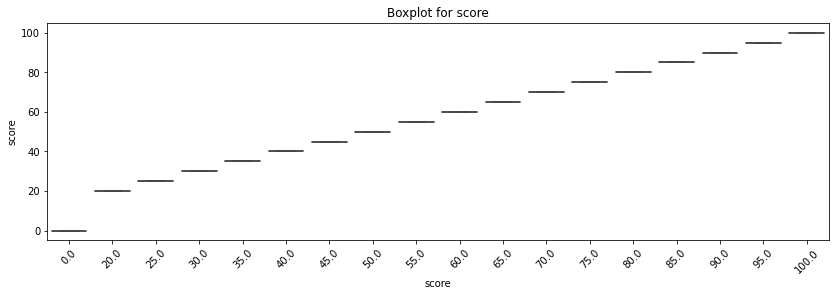

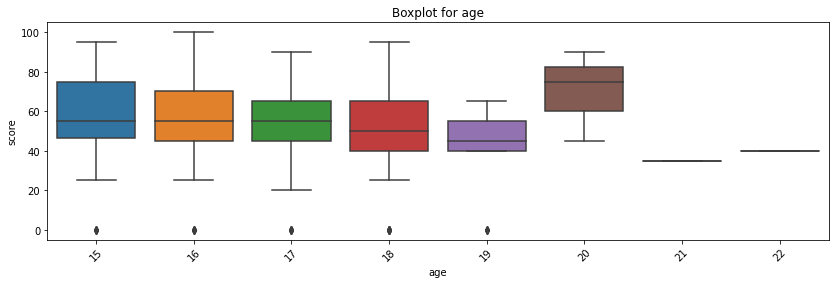

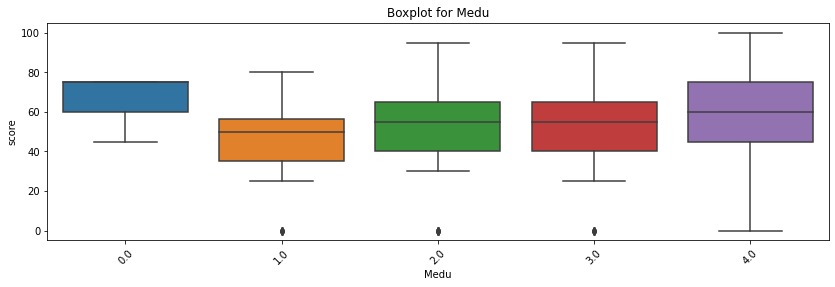

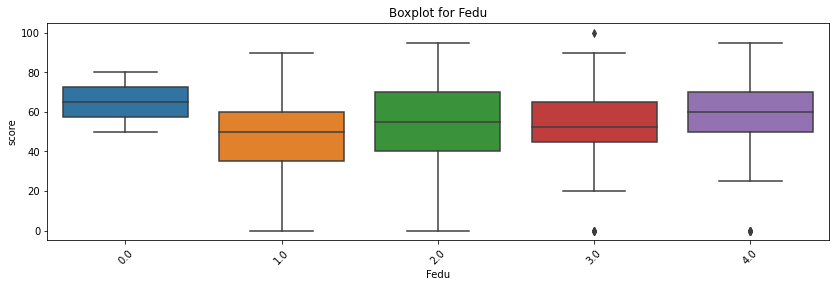

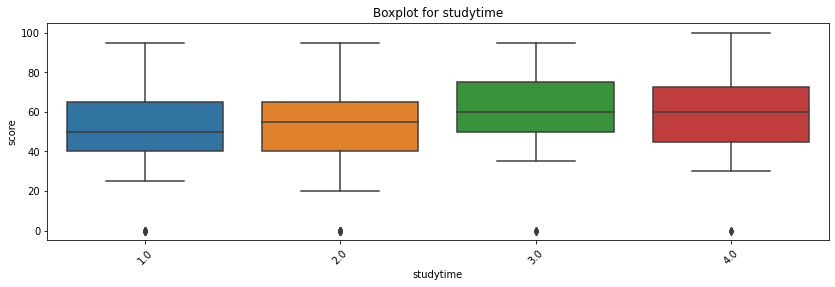

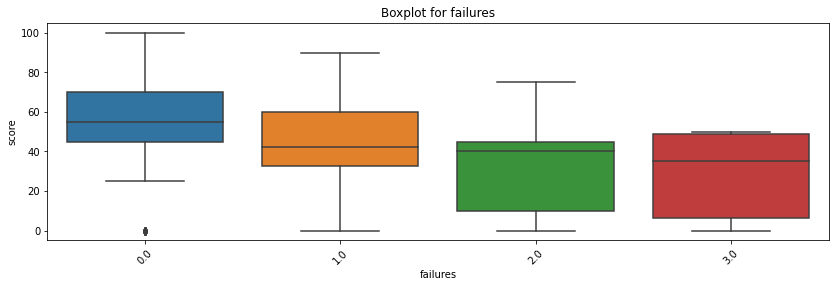

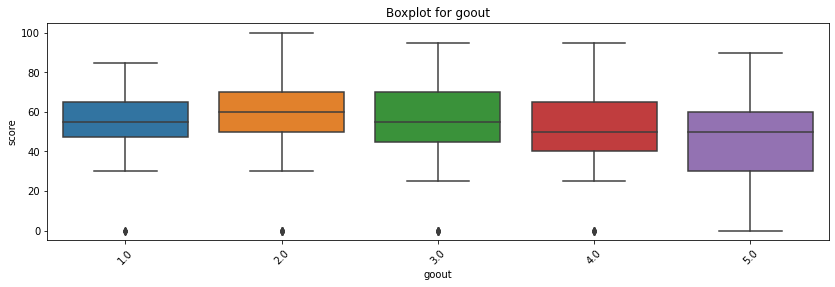

In [137]:
for column in  math_numeric_low.columns:
    sns.displot(math,x = column)

for column in  math_numeric_signific.columns:
    get_boxplot(column)

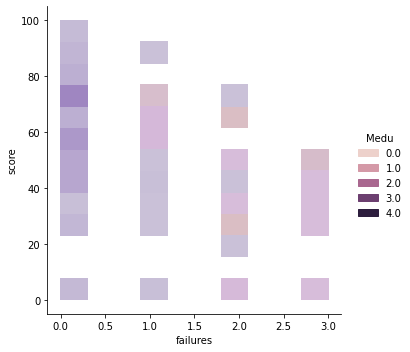

In [140]:
#We didn't get any more significant information.
#Build a histogram with more correlated numbers.
#Failures have a highedt correlcation to score
#The bigger the number of failures, the lower the scores, which is not unrealistic
#Mother's education have quite a high correlation as well, so it's not surprising that it's likely for educated mothers to
#have children with higher scores. Lookimg at 0 scores though it's not guaranted
sns.displot(data=math,x='failures',y='score',hue='Medu')

0.24

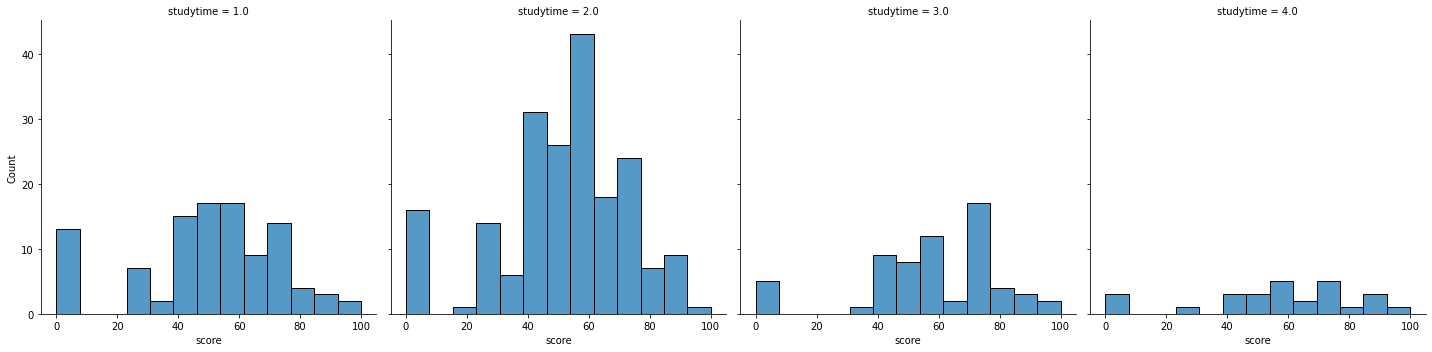

In [232]:
#As we couldn't get the result from Student test, buid some graphs to come with conclusions.
# Let's have a look at categotrical values

sns.displot(data=math,x='score',col='studytime')

#Let's see if it's significant difference between score if traveltime is less than 30 minutes(2) or more

math_traveltime_score_up_to2 = math_numeric[math_numeric.traveltime <= 2]['score']
math_traveltime_score_up_more2 = math_numeric[math_numeric.traveltime > 2]['score']
round(ttest_ind(math_traveltime_score_up_to2,math_traveltime_score_up_more2).pvalue,2)

#As expected, p value is not signifiacnt, so we can't tell that difference in travel time affected the total score

0.45

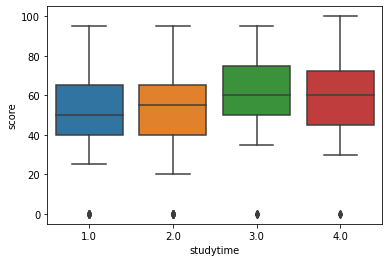

In [233]:
sns.boxplot(data=math,y ='score',x='studytime')
#Let's see if it's significant difference between score if traveltime is less than 5 hours (2) or more

math_studytime_score_up_to2 = math_numeric[math_numeric.studytime <= 2]['score']
math_studytime_score_up_more2 = math_numeric[math_numeric.traveltime > 2]['score']
round(ttest_ind(math_studytime_score_up_to2,math_studytime_score_up_more2).pvalue,2)

#P value doesn't show any significance

0.61

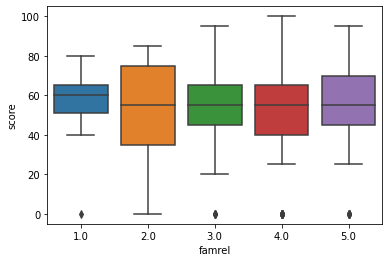

In [239]:
sns.boxplot(data=math,y ='score',x='famrel')


math_famrel_score_up_to3 = math_numeric[math_numeric.famrel <= 2.5]['score']
math_famrel_score_up_more3 = math_numeric[math_numeric.famrel > 2.5]['score']
round(ttest_ind(math_famrel_score_up_to3,math_famrel_score_up_more3).pvalue,2)

#P value doesn't show any significance

0.15

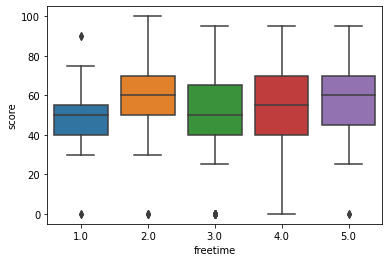

In [240]:
sns.boxplot(data=math,y ='score',x='freetime')
math_freetime_score_up_to3 = math_numeric[math_numeric.freetime <= 2.5]['score']
math_freetime_score_up_more3 = math_numeric[math_numeric.freetime > 2.5]['score']
round(ttest_ind(math_freetime_score_up_to3,math_freetime_score_up_more3).pvalue,2)

#P value is bot significant for the large dataset, but for our dataset we can
#Assume that we are moderately confident that less free time negatively affects the end score

0.07

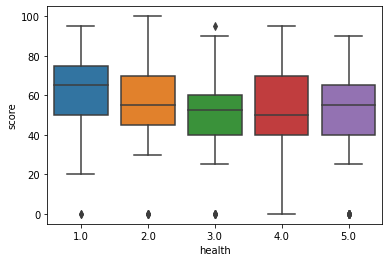

In [245]:
sns.boxplot(data=math,y ='score',x='health')

math_heath_score_up_to3 = math_numeric[math_numeric.health <= 2.5]['score']
math_health_score_up_more3 = math_numeric[math_numeric.health > 2.5]['score']
round(ttest_ind(math_heath_score_up_to3,math_health_score_up_more3).pvalue,2)

#P value is bot significant for the large dataset, but for our dataset we can
#Assume that we are moderately confident that health might affect the score. 

In [ ]:
#Overall, if we use this dataset in the ML model, we'd better choose model decide what fields are needed. 